In [1]:
# ============================================================================
# SETUP
# ============================================================================
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")

Mounted at /content/drive


In [2]:
# ============================================================================
# LOAD PREPROCESSED DATA
# ============================================================================
print("📂 Loading preprocessed data...\n")

DATA_DIR = '/content/drive/MyDrive/EAI6010_Final Project/Processed_Data'
RESULTS_DIR = '/content/drive/MyDrive/EAI6010_Final Project/Results/EDA'

# Create results directory
import os
os.makedirs(RESULTS_DIR, exist_ok=True)

# Load data
train_df = pd.read_csv(f'{DATA_DIR}/train_processed.csv')
print(f"✅ Loaded {len(train_df):,} training samples\n")

📂 Loading preprocessed data...

✅ Loaded 45,414 training samples



📊 Creating Visualization 1: Label Distribution...


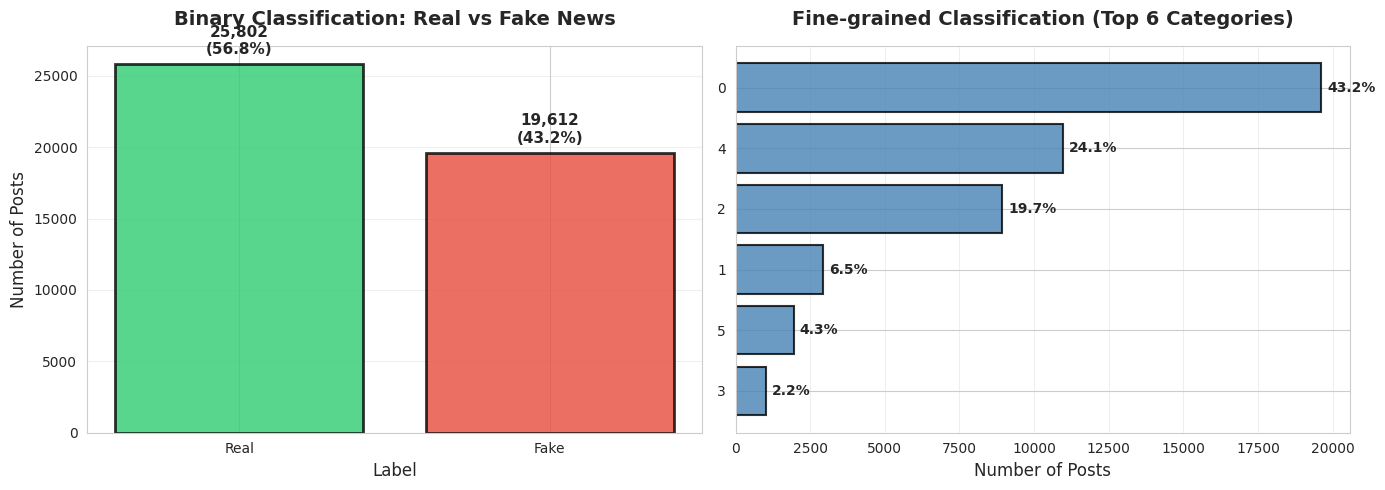

✅ Saved: 01_label_distribution.png



In [3]:
# ============================================================================
# VISUALIZATION 1: Label Distribution
# ============================================================================
print("📊 Creating Visualization 1: Label Distribution...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 2-way distribution
if '2_way_label' in train_df.columns:
    label_map = {0: 'Real', 1: 'Fake'}
    train_df['label_name'] = train_df['2_way_label'].map(label_map)

    counts = train_df['label_name'].value_counts()
    colors = ['#2ecc71', '#e74c3c']

    bars = axes[0].bar(counts.index, counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
    axes[0].set_title('Binary Classification: Real vs Fake News', fontsize=14, fontweight='bold', pad=15)
    axes[0].set_ylabel('Number of Posts', fontsize=12)
    axes[0].set_xlabel('Label', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)

    # Add counts on bars
    for i, (label, count) in enumerate(counts.items()):
        percentage = (count / len(train_df)) * 100
        axes[0].text(i, count + 500, f'{count:,}\n({percentage:.1f}%)',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# 6-way distribution (if available)
if '6_way_label' in train_df.columns:
    counts_6 = train_df['6_way_label'].value_counts().head(6)

    # Create horizontal bar chart
    y_pos = np.arange(len(counts_6))
    axes[1].barh(y_pos, counts_6.values, color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels(counts_6.index, fontsize=10)
    axes[1].set_title('Fine-grained Classification (Top 6 Categories)', fontsize=14, fontweight='bold', pad=15)
    axes[1].set_xlabel('Number of Posts', fontsize=12)
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

    # Add percentages
    for i, count in enumerate(counts_6.values):
        percentage = (count / len(train_df)) * 100
        axes[1].text(count + 200, i, f'{percentage:.1f}%',
                    va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/01_label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: 01_label_distribution.png\n")

📊 Creating Visualization 2: Text Length Analysis...


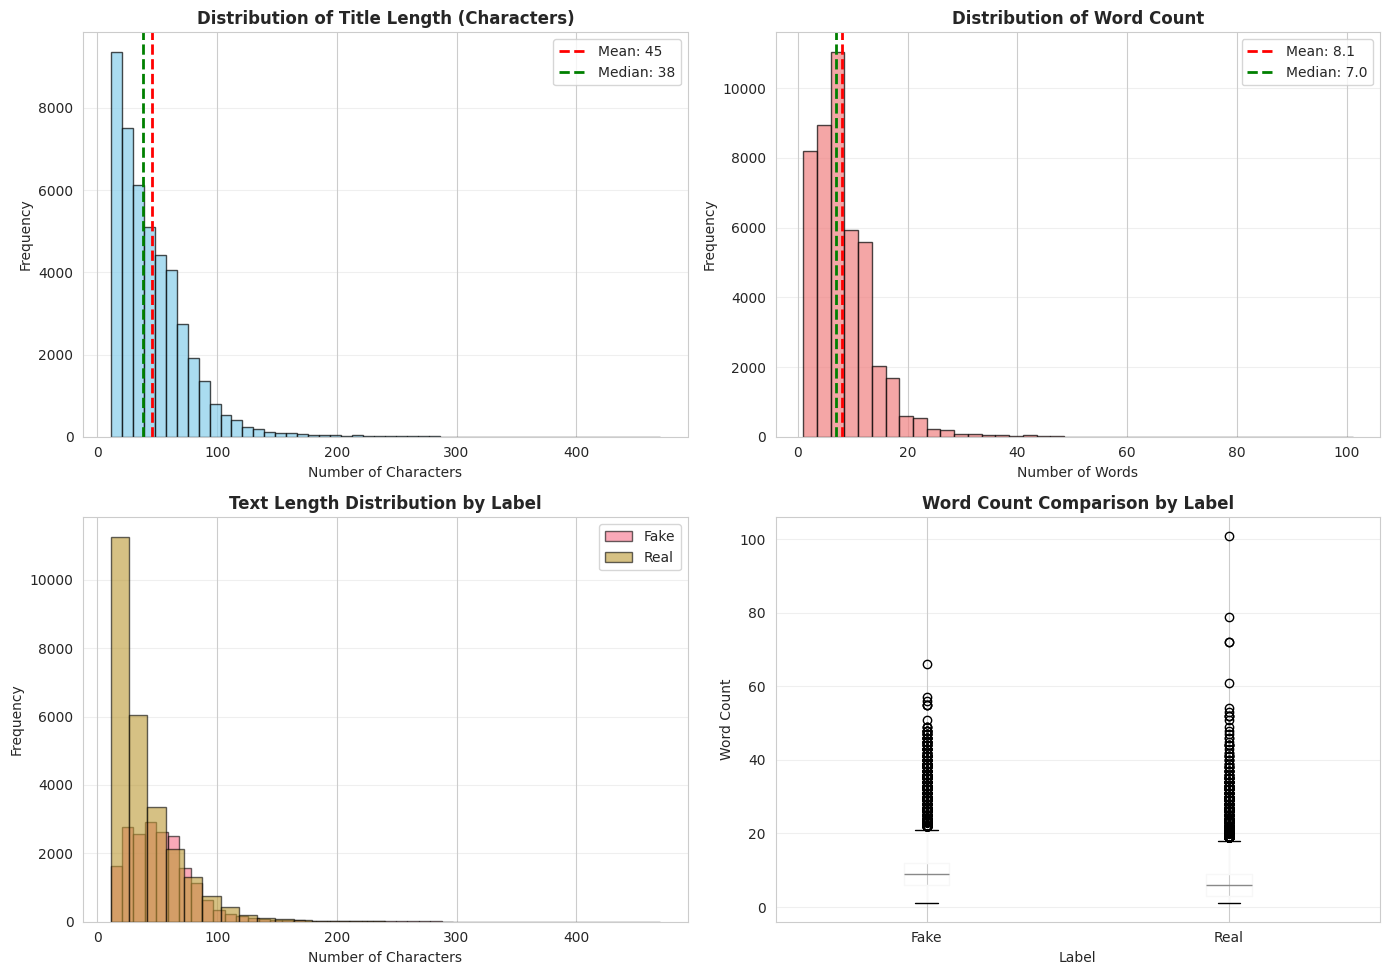

✅ Saved: 02_text_analysis.png



In [4]:
# ============================================================================
# VISUALIZATION 2: Text Length Analysis
# ============================================================================
print("📊 Creating Visualization 2: Text Length Analysis...")

# Calculate text statistics
train_df['text_length'] = train_df['clean_title'].str.len()
train_df['word_count'] = train_df['clean_title'].str.split().str.len()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character length distribution
axes[0, 0].hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {train_df["text_length"].mean():.0f}')
axes[0, 0].axvline(train_df['text_length'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {train_df["text_length"].median():.0f}')
axes[0, 0].set_title('Distribution of Title Length (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Characters', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Word count distribution
axes[0, 1].hist(train_df['word_count'], bins=40, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {train_df["word_count"].mean():.1f}')
axes[0, 1].axvline(train_df['word_count'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {train_df["word_count"].median():.1f}')
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Text length by label
if 'label_name' in train_df.columns:
    for label in train_df['label_name'].unique():
        data = train_df[train_df['label_name'] == label]['text_length']
        axes[1, 0].hist(data, bins=30, alpha=0.6, label=label, edgecolor='black')

    axes[1, 0].set_title('Text Length Distribution by Label', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Number of Characters', fontsize=10)
    axes[1, 0].set_ylabel('Frequency', fontsize=10)
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Box plot
    train_df.boxplot(column='word_count', by='label_name', ax=axes[1, 1])
    axes[1, 1].set_title('Word Count Comparison by Label', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Label', fontsize=10)
    axes[1, 1].set_ylabel('Word Count', fontsize=10)
    axes[1, 1].get_figure().suptitle('')  # Remove automatic title
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/02_text_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: 02_text_analysis.png\n")

📊 Creating Visualization 3: Word Frequency Analysis...


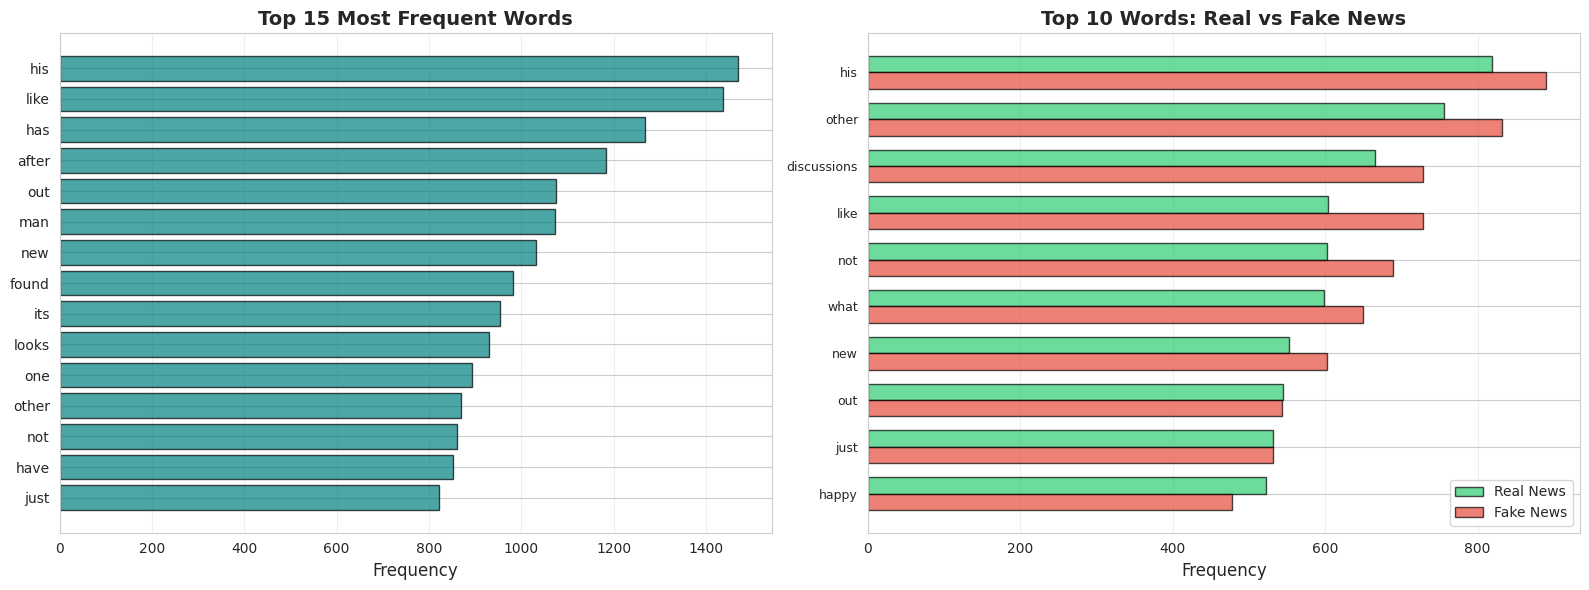

✅ Saved: 03_word_frequency.png



In [5]:
# ============================================================================
# VISUALIZATION 3: Word Frequency Analysis
# ============================================================================
print("📊 Creating Visualization 3: Word Frequency Analysis...")

from collections import Counter
import re

def get_top_words(texts, n=20, label=None):
    """Extract top N most common words"""
    # Combine all texts
    all_text = ' '.join(texts.astype(str))

    # Remove special characters and split
    words = re.findall(r'\b[a-z]{3,}\b', all_text.lower())

    # Remove common stopwords
    stopwords = {'the', 'and', 'for', 'are', 'was', 'with', 'this', 'that', 'from', 'you'}
    words = [w for w in words if w not in stopwords]

    # Count
    word_counts = Counter(words)
    return word_counts.most_common(n)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall top words
top_words = get_top_words(train_df['clean_title'], n=15)
words, counts = zip(*top_words)

axes[0].barh(range(len(words)), counts, color='teal', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words, fontsize=10)
axes[0].set_title('Top 15 Most Frequent Words', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Words by label
if 'label_name' in train_df.columns:
    real_words = get_top_words(train_df[train_df['label_name'] == 'Real']['clean_title'], n=10)
    fake_words = get_top_words(train_df[train_df['label_name'] == 'Fake']['clean_title'], n=10)

    real_w, real_c = zip(*real_words)
    fake_w, fake_c = zip(*fake_words)

    x = np.arange(10)
    width = 0.35

    axes[1].barh(x - width/2, real_c, width, label='Real News', color='#2ecc71', alpha=0.7, edgecolor='black')
    axes[1].barh(x + width/2, fake_c, width, label='Fake News', color='#e74c3c', alpha=0.7, edgecolor='black')

    axes[1].set_yticks(x)
    axes[1].set_yticklabels(real_w, fontsize=9)
    axes[1].set_title('Top 10 Words: Real vs Fake News', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Frequency', fontsize=12)
    axes[1].legend()
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{RESULTS_DIR}/03_word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: 03_word_frequency.png\n")

In [7]:
# ============================================================================
# SUMMARY STATISTICS TABLE
# ============================================================================
print("📊 Creating Summary Statistics Table...")

summary_stats = {
    'Metric': [
        'Total Samples',
        'Real News',
        'Fake News',
        'Avg. Title Length (chars)',
        'Avg. Word Count',
        'Min Title Length',
        'Max Title Length',
        'Median Word Count'
    ],
    'Value': [
        f"{len(train_df):,}",
        f"{(train_df['2_way_label'] == 0).sum():,}",
        f"{(train_df['2_way_label'] == 1).sum():,}",
        f"{train_df['text_length'].mean():.1f}",
        f"{train_df['word_count'].mean():.1f}",
        f"{train_df['text_length'].min()}",
        f"{train_df['text_length'].max()}",
        f"{train_df['word_count'].median():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv(f'{RESULTS_DIR}/summary_statistics.csv', index=False)

print("\n" + "="*60)
print("📋 SUMMARY STATISTICS")
print("="*60)
print(summary_df.to_string(index=False))
print("\n✅ Saved: summary_statistics.csv\n")

📊 Creating Summary Statistics Table...

📋 SUMMARY STATISTICS
                   Metric  Value
            Total Samples 45,414
                Real News 25,802
                Fake News 19,612
Avg. Title Length (chars)   45.5
          Avg. Word Count    8.1
         Min Title Length     11
         Max Title Length    470
        Median Word Count    7.0

✅ Saved: summary_statistics.csv



In [8]:
# ============================================================================
# SAMPLE POSTS FOR REPORT
# ============================================================================
print("📊 Extracting Sample Posts...")

samples = []
for label in [0, 1]:
    sample_posts = train_df[train_df['2_way_label'] == label].head(3)
    for idx, row in sample_posts.iterrows():
        samples.append({
            'Label': 'Real' if label == 0 else 'Fake',
            'Title': row['clean_title'][:100] + '...' if len(row['clean_title']) > 100 else row['clean_title'],
            'Length': len(row['clean_title']),
            'Words': len(row['clean_title'].split())
        })

samples_df = pd.DataFrame(samples)
samples_df.to_csv(f'{RESULTS_DIR}/sample_posts.csv', index=False)
print("✅ Saved: sample_posts.csv\n")

📊 Extracting Sample Posts...
✅ Saved: sample_posts.csv



In [9]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("="*70)
print("🎉 EDA COMPLETE!")
print("="*70)
print(f"\n📁 All visualizations saved to:")
print(f"   {RESULTS_DIR}/")
print("\n📊 Generated files:")
print("   1. 01_label_distribution.png")
print("   2. 02_text_analysis.png")
print("   3. 03_word_frequency.png")
print("   4. summary_statistics.csv")
print("   5. sample_posts.csv")
print("="*70)

🎉 EDA COMPLETE!

📁 All visualizations saved to:
   /content/drive/MyDrive/EAI6010_Final Project/Results/EDA/

📊 Generated files:
   1. 01_label_distribution.png
   2. 02_text_analysis.png
   3. 03_word_frequency.png
   4. summary_statistics.csv
   5. sample_posts.csv
